In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf #only for confusion matrix
from tensorflow import keras #only for the dataset

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Data Analysis

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

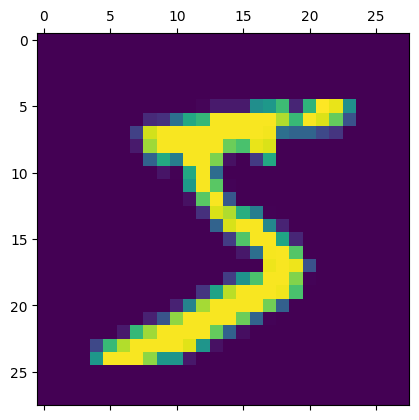

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

np.uint8(5)

Initial Data Transformation

In [8]:
x_train = x_train/255
x_test = x_test/255
x_train_1d = x_train.reshape(len(x_train), 28*28).T
x_test_1d = x_test.reshape(len(x_test), 28*28).T
y_train = y_train.T
y_test = y_test.T

In [9]:
x_train_1d.shape

(784, 60000)

In [10]:
x_test_1d.shape

(784, 10000)

**Neural Network**

In [11]:
#random matrices with proper dimensions for weights and biases
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

#activation for layer 1
def ReLU(Z):
    return np.maximum(Z, 0)

#activation for layer 2
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    #layer 1
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    #layer 2
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#derivative of ReLU
def dReLU(Z):
    return (Z > 0).astype(float)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T #transpose
    return one_hot_Y

def backward_prop(Z1, A1, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * dReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, a):
    W1 = W1 - a * dW1
    b1 = b1 - a * db1
    W2 = W2 - a * dW2
    b2 = b2 - a * db2
    return W1, b1, W2, b2

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, a, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, a)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

Training

In [13]:
W1, b1, W2, b2 = gradient_descent(x_train_1d, y_train, 0.10, 500)

Iteration:  0
[5 1 8 ... 1 5 5] [5 0 4 ... 5 6 8]
0.08633333333333333
Iteration:  10
[8 1 8 ... 8 8 8] [5 0 4 ... 5 6 8]
0.16096666666666667
Iteration:  20
[8 1 8 ... 8 8 8] [5 0 4 ... 5 6 8]
0.22778333333333334
Iteration:  30
[2 3 8 ... 8 8 8] [5 0 4 ... 5 6 8]
0.30483333333333335
Iteration:  40
[2 0 8 ... 8 2 8] [5 0 4 ... 5 6 8]
0.36751666666666666
Iteration:  50
[2 0 8 ... 8 2 6] [5 0 4 ... 5 6 8]
0.40985
Iteration:  60
[2 0 8 ... 1 2 6] [5 0 4 ... 5 6 8]
0.4431833333333333
Iteration:  70
[0 0 8 ... 1 6 6] [5 0 4 ... 5 6 8]
0.4762
Iteration:  80
[0 0 8 ... 1 6 6] [5 0 4 ... 5 6 8]
0.5090166666666667
Iteration:  90
[0 0 8 ... 1 6 6] [5 0 4 ... 5 6 8]
0.5419833333333334
Iteration:  100
[0 0 8 ... 1 6 6] [5 0 4 ... 5 6 8]
0.5711
Iteration:  110
[0 0 8 ... 1 6 6] [5 0 4 ... 5 6 8]
0.5981
Iteration:  120
[0 0 4 ... 1 6 6] [5 0 4 ... 5 6 8]
0.6232
Iteration:  130
[0 0 4 ... 1 6 6] [5 0 4 ... 5 6 8]
0.6443833333333333
Iteration:  140
[0 0 4 ... 1 6 6] [5 0 4 ... 5 6 8]
0.6631166666666667


*Accuracy = 83.455%*

---



Testing

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    accuracy = get_accuracy(predictions, y_test)
    print("Accuracy: ", accuracy)
    return accuracy, predictions

In [17]:
test_accuracy, test_predictions = make_predictions(x_test_1d, W1, b1, W2, b2)

[7 2 1 ... 4 8 6] [7 2 1 ... 4 5 6]
Accuracy:  0.8425


In [18]:
test_predictions

array([7, 2, 1, ..., 4, 8, 6])

**Confusion matrix**

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=test_predictions)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 933,    0,    9,    8,    0,   11,   15,    1,    2,    1],
       [   0, 1107,    2,    5,    0,    1,    6,    0,   12,    2],
       [  18,    6,  852,   44,   15,    5,   38,   14,   31,    9],
       [   7,    7,   22,  850,    0,   48,    7,   18,   46,    5],
       [   4,    4,    5,    0,  811,    4,   23,    2,   13,  116],
       [  23,    6,   10,   68,   31,  645,   23,    6,   64,   16],
       [  14,    2,   25,    0,   19,   28,  856,    1,   13,    0],
       [   3,    6,   37,    9,    7,    0,    0,  869,    4,   93],
       [  11,   21,   22,   56,   29,   49,   21,    4,  724,   37],
       [   7,    9,    9,   10,   98,   16,    0,   61,   21,  778]],
      dtype=int32)>

Text(58.222222222222214, 0.5, 'Truth')

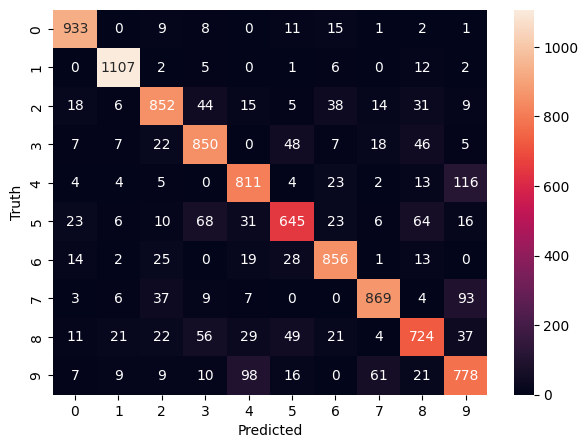

In [24]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')